In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('InsuranceData.csv')
df.head()

,PatientID,Age,Gender,Body Mass Index,Blood Pressure,Diabetic,Children,Smoking,Region,Claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        1340 non-null   int64  
 1   Age              1335 non-null   float64
 2   Gender           1340 non-null   object 
 3   Body Mass Index  1340 non-null   float64
 4   Blood Pressure   1340 non-null   int64  
 5   Diabetic         1340 non-null   object 
 6   Children         1340 non-null   int64  
 7   Smoking          1340 non-null   object 
 8   Region           1337 non-null   object 
 9   Claim            1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [74]:
df.shape

(1340, 10)

In [75]:
df.describe()

,PatientID,Age,Body Mass Index,Blood Pressure,Children,Claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [76]:
df.isnull().sum()

PatientID          0
Age                5
Gender             0
Body Mass Index    0
Blood Pressure     0
Diabetic           0
Children           0
Smoking            0
Region             3
Claim              0
dtype: int64

<Axes: >

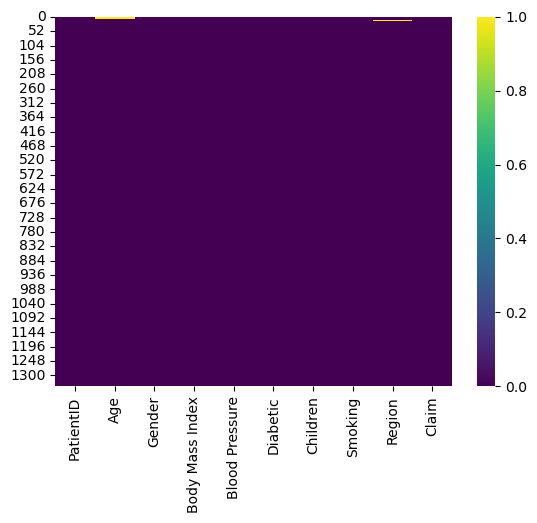

In [77]:
sns.heatmap(df.isnull(),cmap='viridis')

#there are few null values as seen from above and the heatmap 

In [78]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

#replacing null values in Age column with their average

In [79]:
df.dropna(inplace=True)

#dropping rest of the missing values

In [80]:
df.isnull().sum()

PatientID          0
Age                0
Gender             0
Body Mass Index    0
Blood Pressure     0
Diabetic           0
Children           0
Smoking            0
Region             0
Claim              0
dtype: int64

In [81]:
df.head()

,PatientID,Age,Gender,Body Mass Index,Blood Pressure,Diabetic,Children,Smoking,Region,Claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [82]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
gender=gender.astype(int)
gender.head()

#creating new column for Gender, replacing male and female with 1 and 0

,male
0,1
1,1
2,1
3,1
4,1


In [83]:
df['Diabetic']=df['Diabetic'].map({'Yes': 1, 'No': 0})

In [84]:
df['Smoking']=df['Smoking'].map({'Yes': 1, 'No': 0})
#replacing Yes No with 1 and 0

df.head()

,PatientID,Age,Gender,Body Mass Index,Blood Pressure,Diabetic,Children,Smoking,Region,Claim
0,1,39.000000,male,23.2,91,1,0,0,southeast,1121.87
1,2,24.000000,male,30.1,87,0,0,0,southeast,1131.51
2,3,38.078652,male,33.3,82,1,0,0,southeast,1135.94
3,4,38.078652,male,33.7,80,0,0,0,northwest,1136.40
4,5,38.078652,male,34.1,100,0,0,0,northwest,1137.01


In [85]:
df=pd.concat([df,gender],axis=1)

In [86]:
df.drop(['Region','PatientID','Gender'],axis=1,inplace=True)
#dropping unnecessary columns like categorical columns and PatientID

In [87]:
df.head()

,Age,Body Mass Index,Blood Pressure,Diabetic,Children,Smoking,Claim,male
0,39.000000,23.2,91,1,0,0,1121.87,1
1,24.000000,30.1,87,0,0,0,1131.51,1
2,38.078652,33.3,82,1,0,0,1135.94,1
3,38.078652,33.7,80,0,0,0,1136.40,1
4,38.078652,34.1,100,0,0,0,1137.01,1


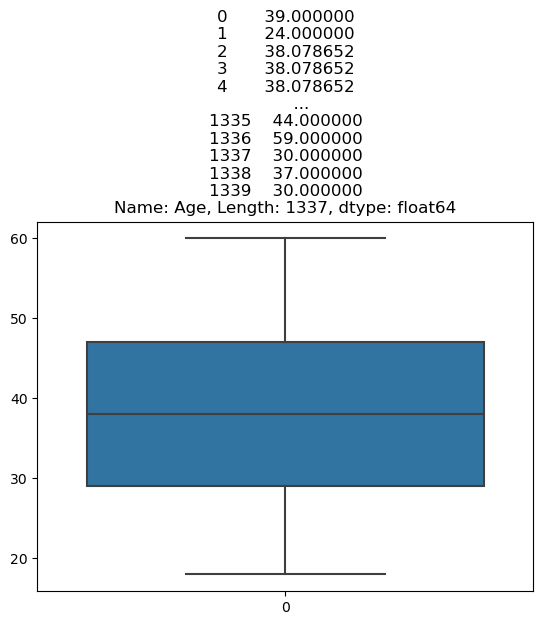

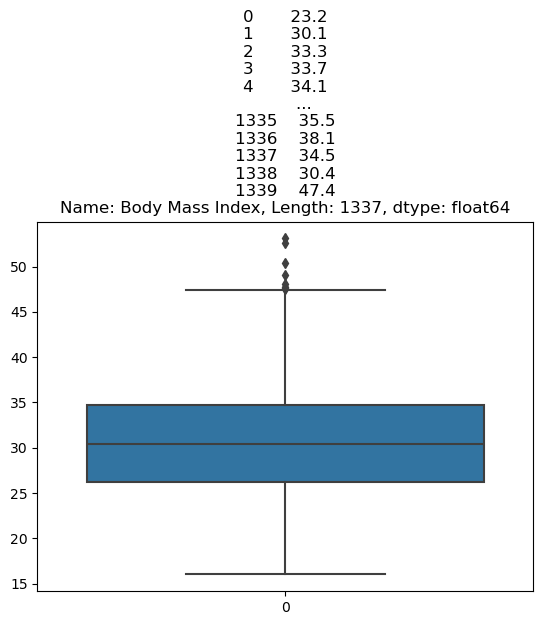

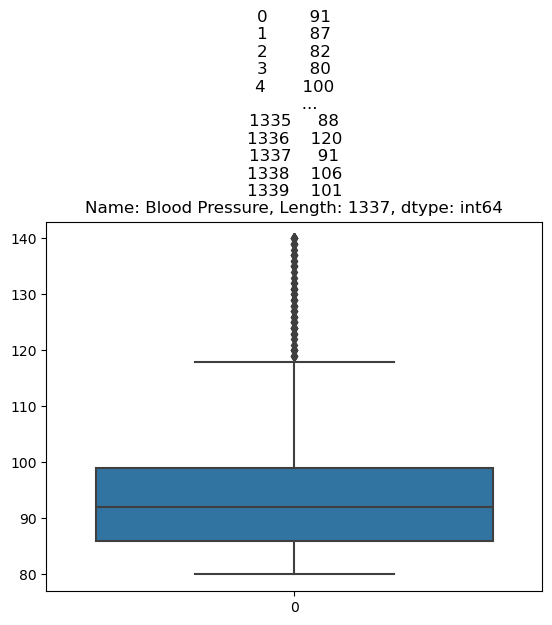

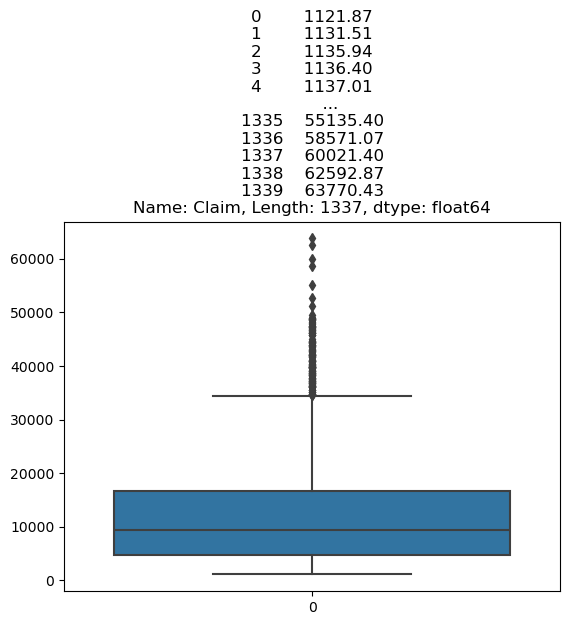

In [88]:
#detecting outliers
cols=df[['Age','Body Mass Index','Blood Pressure','Claim']]
for i in cols:
    sns.boxplot(df[i])
    plt.title(df[i])
    plt.show()

#There are outliers except Age column

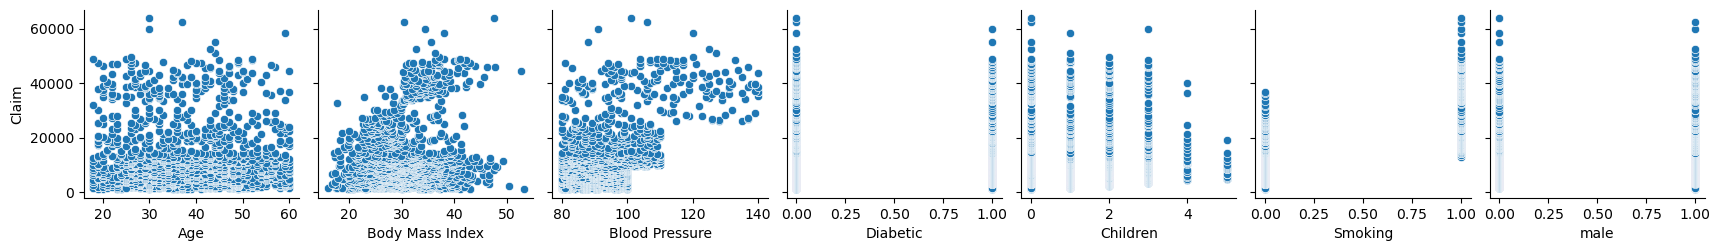

In [89]:
sns.pairplot(df,x_vars=['Age','Body Mass Index','Blood Pressure','Diabetic','Children','Smoking','male'],y_vars='Claim',kind='scatter')
plt.show()

#showing relationships between different columns and the target column

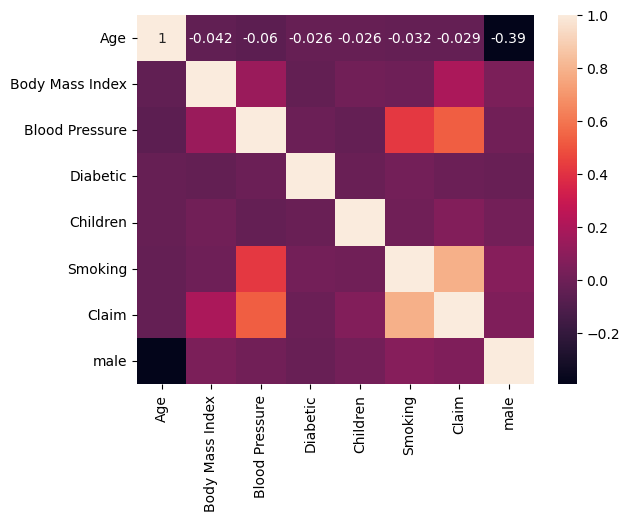

In [90]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#Claim column is more correlated with Smoking and Blood Pressure column, lets use Blood Pressure and Claimn columns to perform  regression.

In [91]:
X=df['Blood Pressure']
y=df['Claim']

In [92]:
from sklearn.model_selection import train_test_split
#splitting our variable into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.7, test_size = 0.3,random_state = 100)

In [93]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_train_sm

,const,Blood Pressure
969,1.0,91
525,1.0,84
158,1.0,86
674,1.0,93
1175,1.0,99
...,...,...
805,1.0,81
56,1.0,88
353,1.0,91
82,1.0,98


In [94]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

#the intercept and the slope

const            -37418.398648
Blood Pressure      540.752952
dtype: float64

In [95]:
lr.summary()

#R squared value is 0.257 meaning only 25.7% of the variance in the dependent variable is explained by the model.
#Coefficient for Blood Pressure is 540.7530
#F statistic has a very low p value meaning that the model fit is statistically significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Claim   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     323.4
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           2.60e-62
Time:                        10:36:49   Log-Likelihood:                -9996.9
No. Observations:                 935   AIC:                         2.000e+04
Df Residuals:                     933   BIC:                         2.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.742e+04   2856.569    -13.099      0.000    -4.3e+04   -3.18e+04
Blood Pressure   540.7530     30.069     17.984      0.000     481.742     599.763
==============================================================================
Omnibus:                      232.848   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.737
Skew:                           1.428   Prob(JB):                    1.64e-102
Kurtosis:                       4.967   Cond. No.                         779.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

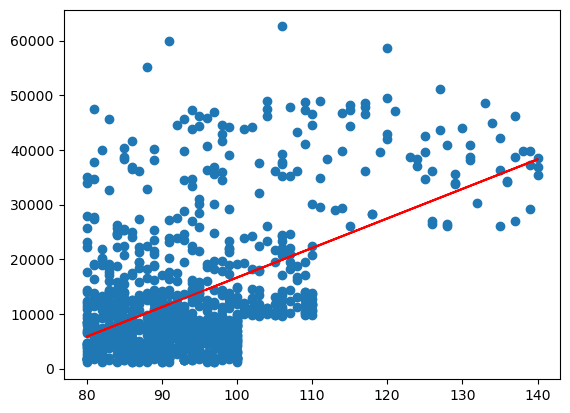

In [96]:
# Let's visualize how well the model fit the data.
plt.scatter(X_train,y_train)
plt.plot(X_train,-37418.398+X_train*540.752,'r')
plt.show()

In [97]:
#Predictions on the Test Set
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [138]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))
mse

9301.651409929806

In [140]:
r2=r2_score(y_test,y_pred)
r2

#low r2 value, only 34.3% of the variance is explained by the model.

0.3430844153604915

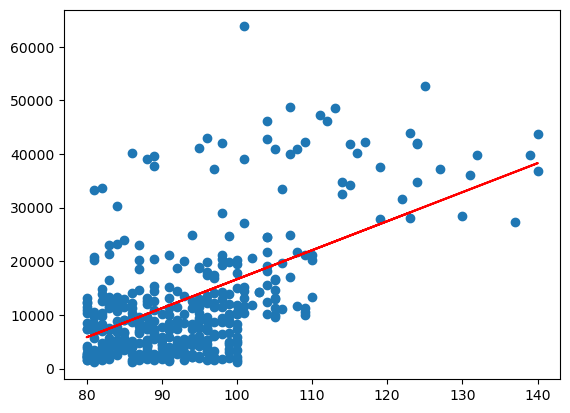

In [101]:
plt.scatter(X_test,y_test)
plt.plot(X_test,-37418.398+X_test*540.752,'r')
plt.show()